Co-occurance
1. 3 co-occurrence plots next to each other
    - [ ] Use default colouring
    - [ ] For maybe 5 sizes
    - [ ] Do 1 version without any clustering
    - [ ] Do 1 other version with clustering using 2000 runs
    - [ ] Use entire set, not only training data

In [62]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [73]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/plot.py'>

In [84]:
# 2. For a sample size, compute the fraction of correct members in the group of each icc
# that is get the partition map and check fraction overlap between rows in where the 1s are excluding diagonal
nr_runs = 50
digit = 0
samples_path = '../data/OUTPUT/mcm/sample_sizes/'
samples_path = '../data/OUTPUT/mcm/sample_sizes_fromfull/'

fname = 'MCMs_'

# sample_sizes = [10, 1000 ,2000,3000, 5423]
# sample_sizes = [10, 100 ,500,1000, 2000]
sample_sizes = [100,500,1000,3000,6315] # final

coo_sum = np.empty((5,121,121),dtype=int)

mcm_all_com = []
for s, sample_size in enumerate(sample_sizes):
    # load runs
    mcm_sample = []
    mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
    for i in range(nr_runs): #len(os.listdir(mcms_path))):
        with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
                mcm_sample.append(json.load(f))
    mcm_0_multisample = np.array([myplot.create_cooccurance_matrix(mcm_sample[i][digit]) for i in range(nr_runs)],dtype=int)
    coo_sum[s,:,:] = np.sum(mcm_0_multisample,axis=0)
    mcm_all_com.append(mcm_sample)




# separate plots

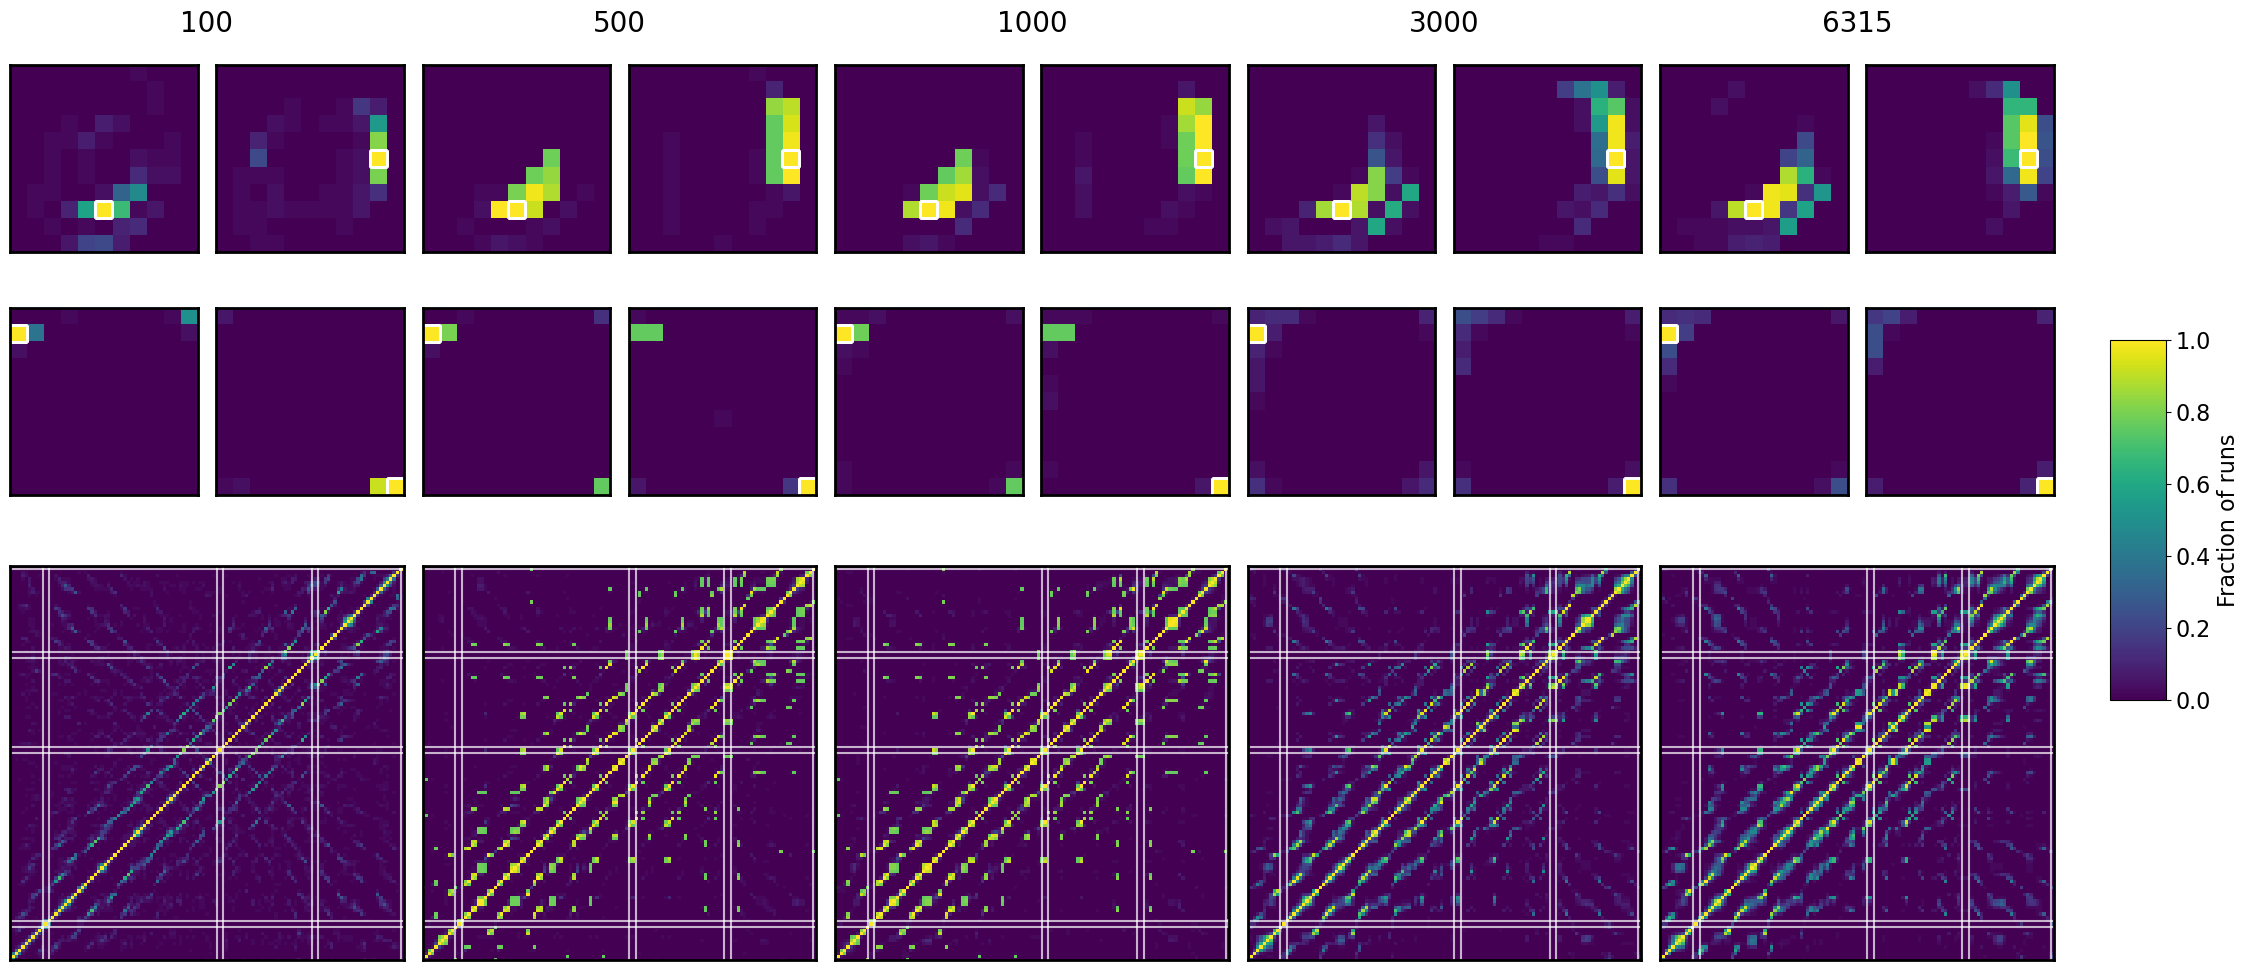

In [85]:
from matplotlib import gridspec



scale = 2
n_col = 10
n_row = 3

# generate grid
fig = plt.figure(figsize=(scale*14, scale*6)) 
gs = gridspec.GridSpec(nrows=n_row, ncols=n_col, height_ratios=[1,1, 2],width_ratios=[1]*n_col)
axs = []
cmap = myplot.cmap_to_gray("royalblue", reverse=True,gray="white")
cmap = "viridis"

gss = []
for r in range(3):
    for c in range(n_col):
        gs0 = gs[0].subgridspec(r+1, c+1, wspace=0, hspace=0)
        gss.append(gs0)


for n in range(n_col):
    ax1 = fig.add_subplot(gs[0,n])
    axs.append(ax1)
for n in range(n_col):
    ax1 = fig.add_subplot(gs[1,n])
    axs.append(ax1)
for n in range(int(n_col//2)):
    ax = fig.add_subplot(gs[2,n*2:(n*2)+2])
    axs.append(ax)



# fill with data
# interesting_pix = np.array([[34,60],[53,103]])
interesting_pix = np.array([[93,64],[11,120]]).T # based of Std!


# interesting_pix = [103]

# parition maps
size_idx = np.repeat(np.arange(5), 2)
upper_axs = axs[:n_col*(n_row-1)]
for i, ax in enumerate(upper_axs):
    j = i // n_col

    im = myplot.interesting_pix_map(mcm_all_com[size_idx[i%n_col]], [interesting_pix[i%2][j]], nr_runs, digit=digit,ax = ax,map_kwargs={"cbar":None,"bcolor":"white"}, show_letters=False,cmap=cmap)

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.83,
            wspace=0.1, hspace=0.02)
cbar_ax = fig.add_axes([0.85, 0.35, 0.02, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax)   
cbar.set_label("Fraction of runs",fontsize=16)
    # ax.axis("off")
cbar.ax.tick_params(labelsize=16)


# co-occurance matrices
lower_axs = axs[(n_row-1)*n_col:]
colors = ["red", "orange", "yellow","green"]
line_col = "white"
for i, ax in enumerate(lower_axs):
    im = ax.imshow(coo_sum[i,:,:], cmap=cmap)
    for j, pixel_idx in enumerate(interesting_pix.flat):

        ax.axhline(pixel_idx+1, color= line_col,alpha=.7) 
        ax.axhline(pixel_idx-1, color= line_col,alpha=.7) 

        ax.axvline(pixel_idx+1, color= line_col,alpha=.7)  
        ax.axvline(pixel_idx-1, color= line_col,alpha=.7) 
    ax.set_xlim((0,120))
    ax.set_ylim((0,120))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)



# titles above every second subplot
for i in range(0,n_col,2):
    ax_left = fig.add_subplot(gs[i:i+2])
    ax_left.axis('off')
    ax_left.set_title(sample_sizes[i//2], fontsize=20)

plt.savefig("./img/intpix_coo.png",dpi=100,bbox_inches="tight")

# Clustered

In [86]:
coo_clust = np.empty(coo_sum.shape)
for i, coo in enumerate(coo_sum):
    coo_clust[i,:,:] = myplot.do_cluster(coo, coo_sum[2,:,:])

Text(0.5, 0.98, 'Co-occurance plots over 10 runs for each sample size. \n See similar groupings emerge over samples. \n Clustered at 2000')

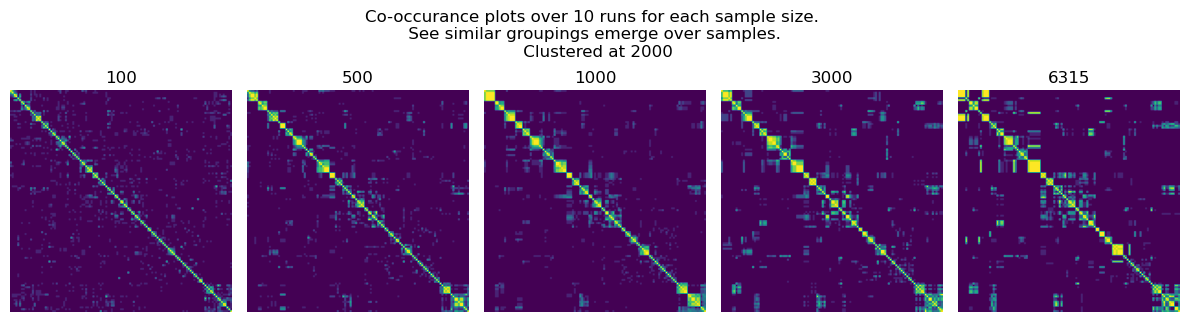

In [67]:
scale = 1
fig, axs = plt.subplots(1, 5, figsize=(12*scale, 4*scale))

for i, ax in enumerate(axs):
    ax.imshow(coo_clust[i,:,:], cmap='viridis')
    ax.axis('off')
    ax.set_title(f'{sample_sizes[i]}')

plt.tight_layout()
plt.suptitle("Co-occurance plots over 10 runs for each sample size. \n See similar groupings emerge over samples. \n Clustered at 2000")
# plt.savefig("../figures/co-occurance_clust2k.png", dpi=300, bbox_inches="tight")


In [68]:
# mcms_5k = mcm_all_com[-1]
# digit = 0

# interesting_pix = [34,60,53]

# def interesting_pix_map(mcms_ss, interesting_pix, nr_runs, digit, ax, map_kwargs={},show_letters=True):
#     # borders around selected pixels
#     b = np.zeros(121)
#     b[interesting_pix] = 1
#     b = b.reshape((11,11))
#     b = myplot.find_borders(b)

#     icc_loc = np.zeros((11,11))
#     icc_sum = np.zeros((11,11))

#     for pixel_idx in interesting_pix:
#         row_i = pixel_idx // 11
#         col_i = pixel_idx % 11
#         for mcms in mcms_ss:
#             comm = myplot.generate_icc_comms_map(mcms[digit])
#             icc_sum += np.where(comm==comm[row_i,col_i], 1,0)
#         icc_loc += np.where(icc_sum>0,1,0).astype(int)

        

#     letters = myplot.int_to_letters(icc_loc.astype(int),first_ascii = 64)
#     letters[letters == "@"] = "."
#     if show_letters:
#         myplot.partition_map(ax, icc_sum/nr_runs,letters, b,cmap="viridis", normalise=False, **map_kwargs)
#     else:         
#         myplot.partition_map(ax, icc_sum/nr_runs,None, b,cmap="viridis", normalise=False, **map_kwargs)


# interesting_pix_map(mcms_5k, interesting_pix, nr_runs, digit=0,ax = plt.gca(),show_letters=False)


In [69]:
# fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# for i, ax in enumerate(axs):
#     ax.imshow(coo_sum[i,:,:], cmap='viridis')
#     ax.axis('off')
#     ax.set_title(f'{sample_sizes[i]}')

# plt.tight_layout()
# plt.suptitle("Co-occurance plots over 10 runs for each sample size. \n See similar groupings emerge over samples. \n UNCLUSTERED")
# plt.savefig("../figures/co-occurance_noclust2k.png", dpi=300, bbox_inches="tight")
